In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data=pd.read_csv('DSDataLastThreeMonths.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6697 entries, 0 to 6696
Data columns (total 14 columns):
CASTNO           6697 non-null object
HM_WT            6697 non-null int64
AIM_S            6697 non-null float64
HM_S             6697 non-null float64
HM_C             6697 non-null float64
HM_SI            6697 non-null float64
HM_TI            6697 non-null float64
HM_MN            6697 non-null float64
CAC2             6697 non-null int64
MG               6697 non-null int64
HM_TEMP          6094 non-null float64
CAC2_INJ_TIME    6697 non-null int64
MG_INJ_TIME      6697 non-null int64
DS_S             6697 non-null float64
dtypes: float64(8), int64(5), object(1)
memory usage: 732.6+ KB


In [5]:
#Filling missing values of HM_TEMP with the mean .
data_fit=data.fillna(data["HM_TEMP"].mean())

In [6]:
data_fit.keys()

Index(['CASTNO', 'HM_WT', 'AIM_S', 'HM_S', 'HM_C', 'HM_SI', 'HM_TI', 'HM_MN',
       'CAC2', 'MG', 'HM_TEMP', 'CAC2_INJ_TIME', 'MG_INJ_TIME', 'DS_S'],
      dtype='object')

In [7]:
data_fit.describe()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000
mean,165.411229,0.004969,0.039572,4.562660,0.612587,0.066564,0.042735,354.522771,50.390623,1388.349688,9.372555,4.919068,0.007524
std,6.315830,0.001027,0.009874,0.053558,0.166054,0.014707,0.004797,59.711921,9.244264,35.909330,1.708239,1.196379,0.002783
min,140.000000,0.003000,0.011000,4.120000,0.186000,0.020000,0.013000,209.000000,0.000000,1226.000000,5.000000,0.000000,0.001000
25%,161.000000,0.005000,0.033000,4.540000,0.496000,0.057000,0.040000,318.000000,45.000000,1369.000000,8.000000,4.000000,0.005000
50%,165.000000,0.005000,0.038000,4.560000,0.586000,0.066000,0.042000,345.000000,49.000000,1388.349688,9.000000,5.000000,0.007000
75%,170.000000,0.005000,0.045000,4.590000,0.706000,0.075000,0.046000,380.000000,55.000000,1408.000000,10.000000,5.000000,0.009000
max,180.000000,0.012000,0.095000,4.770000,1.644000,0.145000,0.085000,1283.000000,198.000000,1574.000000,25.000000,15.000000,0.024000


In [8]:
data_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6697 entries, 0 to 6696
Data columns (total 14 columns):
CASTNO           6697 non-null object
HM_WT            6697 non-null int64
AIM_S            6697 non-null float64
HM_S             6697 non-null float64
HM_C             6697 non-null float64
HM_SI            6697 non-null float64
HM_TI            6697 non-null float64
HM_MN            6697 non-null float64
CAC2             6697 non-null int64
MG               6697 non-null int64
HM_TEMP          6697 non-null float64
CAC2_INJ_TIME    6697 non-null int64
MG_INJ_TIME      6697 non-null int64
DS_S             6697 non-null float64
dtypes: float64(8), int64(5), object(1)
memory usage: 732.6+ KB


In [9]:
#CASTNO column has no use it is just a number to denote a tuple.
columns_to_drop=["CASTNO"]
data_fit=data_fit.drop(columns_to_drop,axis=1)

In [10]:
data_fit.head()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
0,171,0.005,0.040,4.572,0.518,0.069,0.040,347,49,1387.0,10,4,0.009
1,161,0.005,0.035,4.580,0.559,0.070,0.041,361,45,1386.0,10,4,0.007
2,170,0.005,0.042,4.590,0.468,0.044,0.036,355,52,1368.0,9,4,0.013
3,159,0.005,0.034,4.530,0.737,0.077,0.040,313,44,1401.0,9,4,0.010
4,162,0.005,0.042,4.560,0.443,0.056,0.037,360,55,1346.0,10,5,0.013


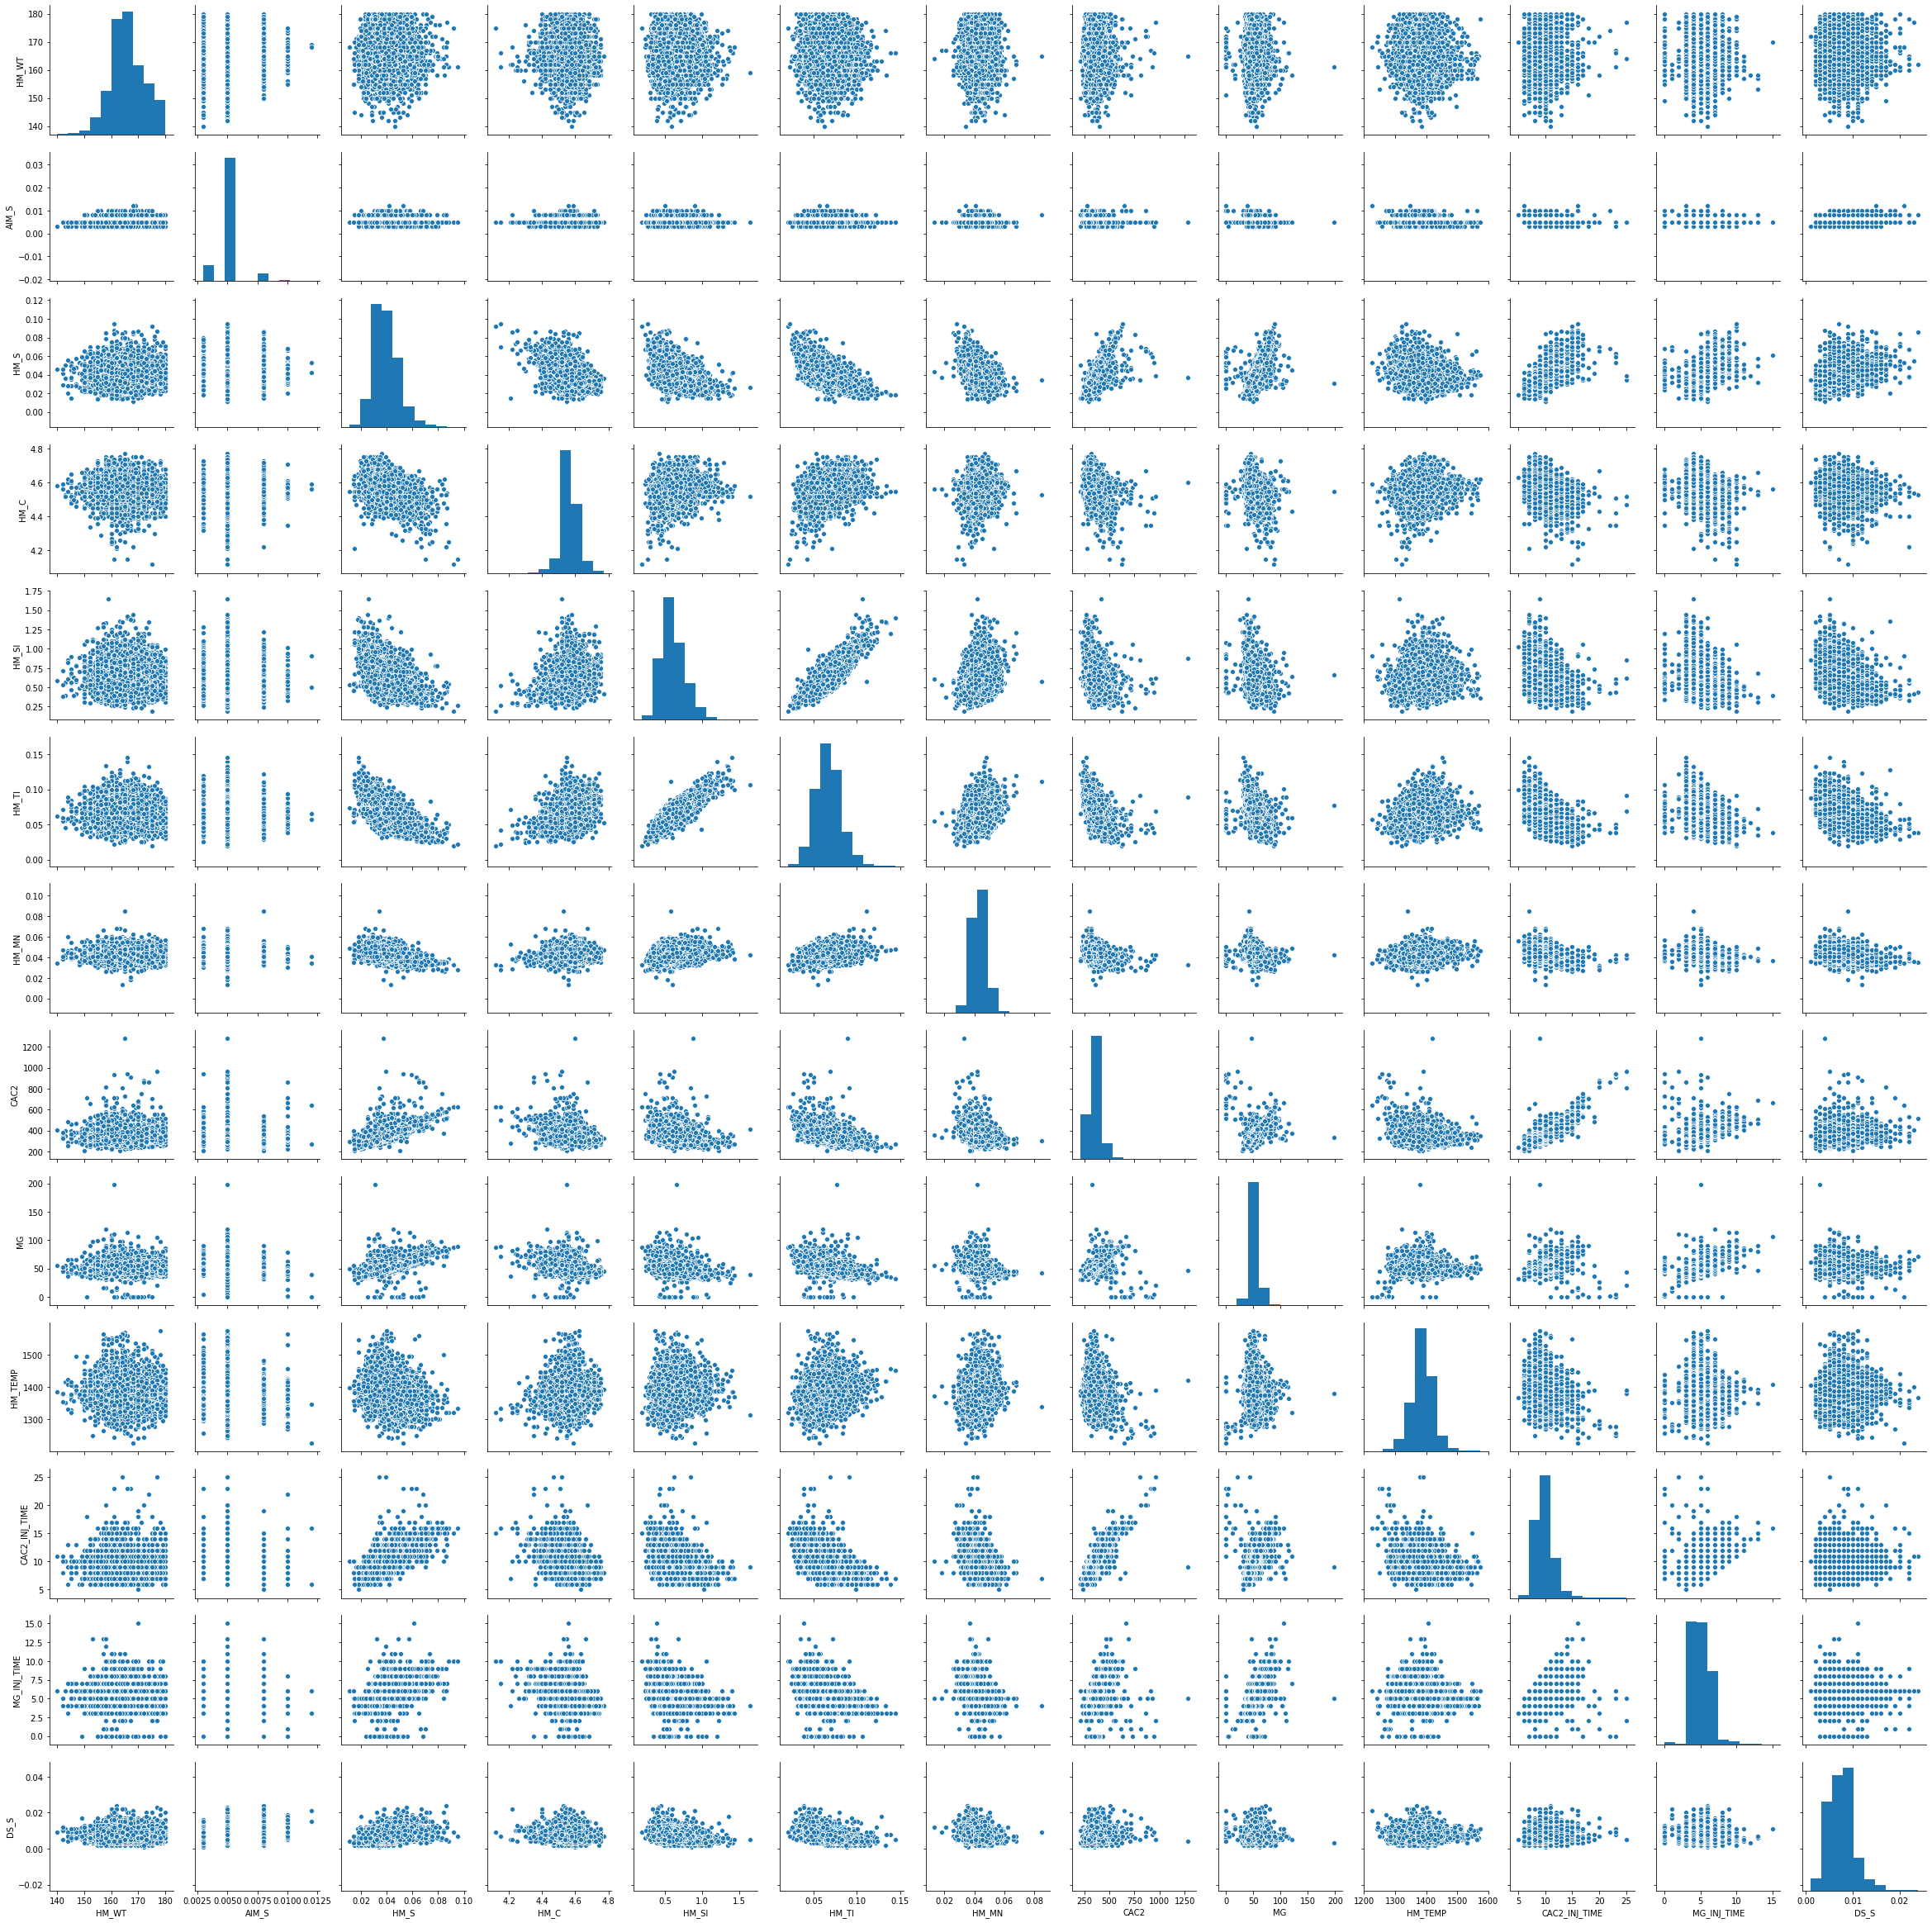

In [11]:
sns.pairplot(data_fit)

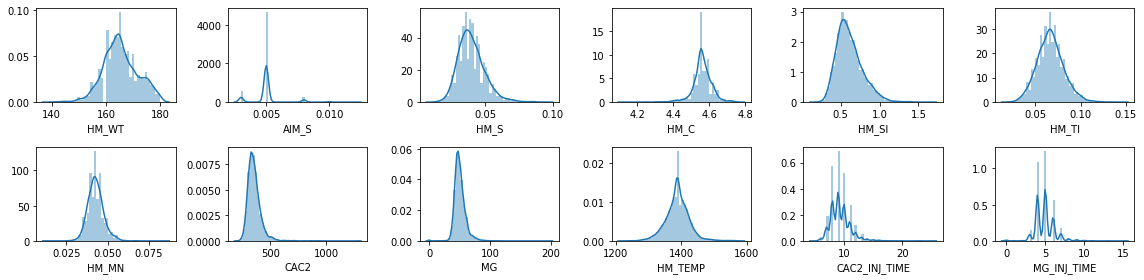

In [12]:
rows = 2
cols = 6

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = data_fit.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data_fit[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

In [13]:
corrmat = data_fit.corr()
corrmat

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
HM_WT,1.000000,0.005427,0.032951,-0.003908,-0.023989,0.007086,-0.018630,0.014474,0.013892,0.024465,0.022604,0.013576,0.031703
AIM_S,0.005427,1.000000,0.012473,0.028681,0.021616,0.016526,-0.022362,-0.118918,-0.142063,-0.036390,-0.114013,-0.154091,0.153652
HM_S,0.032951,0.012473,1.000000,-0.388264,-0.446847,-0.624166,-0.473154,0.770198,0.711293,-0.149753,0.752674,0.595271,0.407992
HM_C,-0.003908,0.028681,-0.388264,1.000000,0.177217,0.265293,0.133561,-0.318089,-0.281969,0.103143,-0.317918,-0.258539,-0.126925
HM_SI,-0.023989,0.021616,-0.446847,0.177217,1.000000,0.877927,0.251555,-0.335536,-0.328041,0.129409,-0.337986,-0.284562,-0.398098
HM_TI,0.007086,0.016526,-0.624166,0.265293,0.877927,1.000000,0.313036,-0.494859,-0.438410,0.155067,-0.485603,-0.393740,-0.511790
HM_MN,-0.018630,-0.022362,-0.473154,0.133561,0.251555,0.313036,1.000000,-0.373344,-0.335800,0.107311,-0.367867,-0.278776,-0.222651
CAC2,0.014474,-0.118918,0.770198,-0.318089,-0.335536,-0.494859,-0.373344,1.000000,0.572786,-0.181692,0.851385,0.555831,0.233409
MG,0.013892,-0.142063,0.711293,-0.281969,-0.328041,-0.438410,-0.335800,0.572786,1.000000,-0.069965,0.573159,0.676112,0.127598
HM_TEMP,0.024465,-0.036390,-0.149753,0.103143,0.129409,0.155067,0.107311,-0.181692,-0.069965,1.000000,-0.167540,-0.072561,0.007867


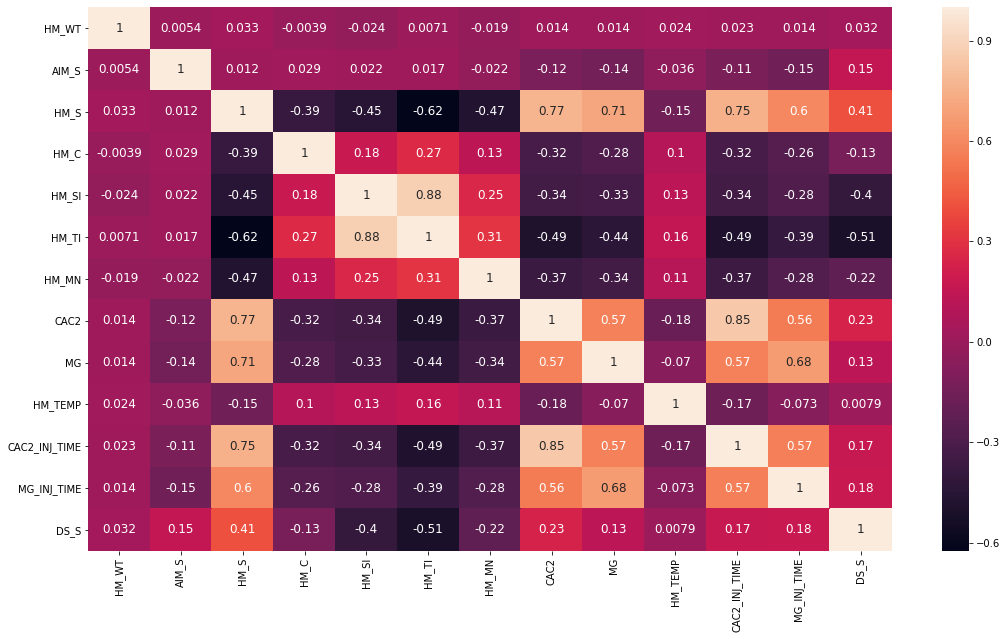

In [14]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

In [79]:
#columns_to_drop=["AIM_S","MG","HM_TEMP","HM_WT","CAC2_INJ_TIME","MG_INJ_TIME","HM_C"]
columns_to_drop=["HM_TEMP"]

In [104]:
# As we can see HM_TEMP has very low value in correlational matrix correspond to DS_S if we include 
#it will unnecessarily increase the complexity.
data_fit2=data_fit.drop(columns_to_drop,axis=1)

In [81]:
data_fit2.head()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
0,171,0.005,0.040,4.572,0.518,0.069,0.040,347,49,10,4,0.009
1,161,0.005,0.035,4.580,0.559,0.070,0.041,361,45,10,4,0.007
2,170,0.005,0.042,4.590,0.468,0.044,0.036,355,52,9,4,0.013
3,159,0.005,0.034,4.530,0.737,0.077,0.040,313,44,9,4,0.010
4,162,0.005,0.042,4.560,0.443,0.056,0.037,360,55,10,5,0.013


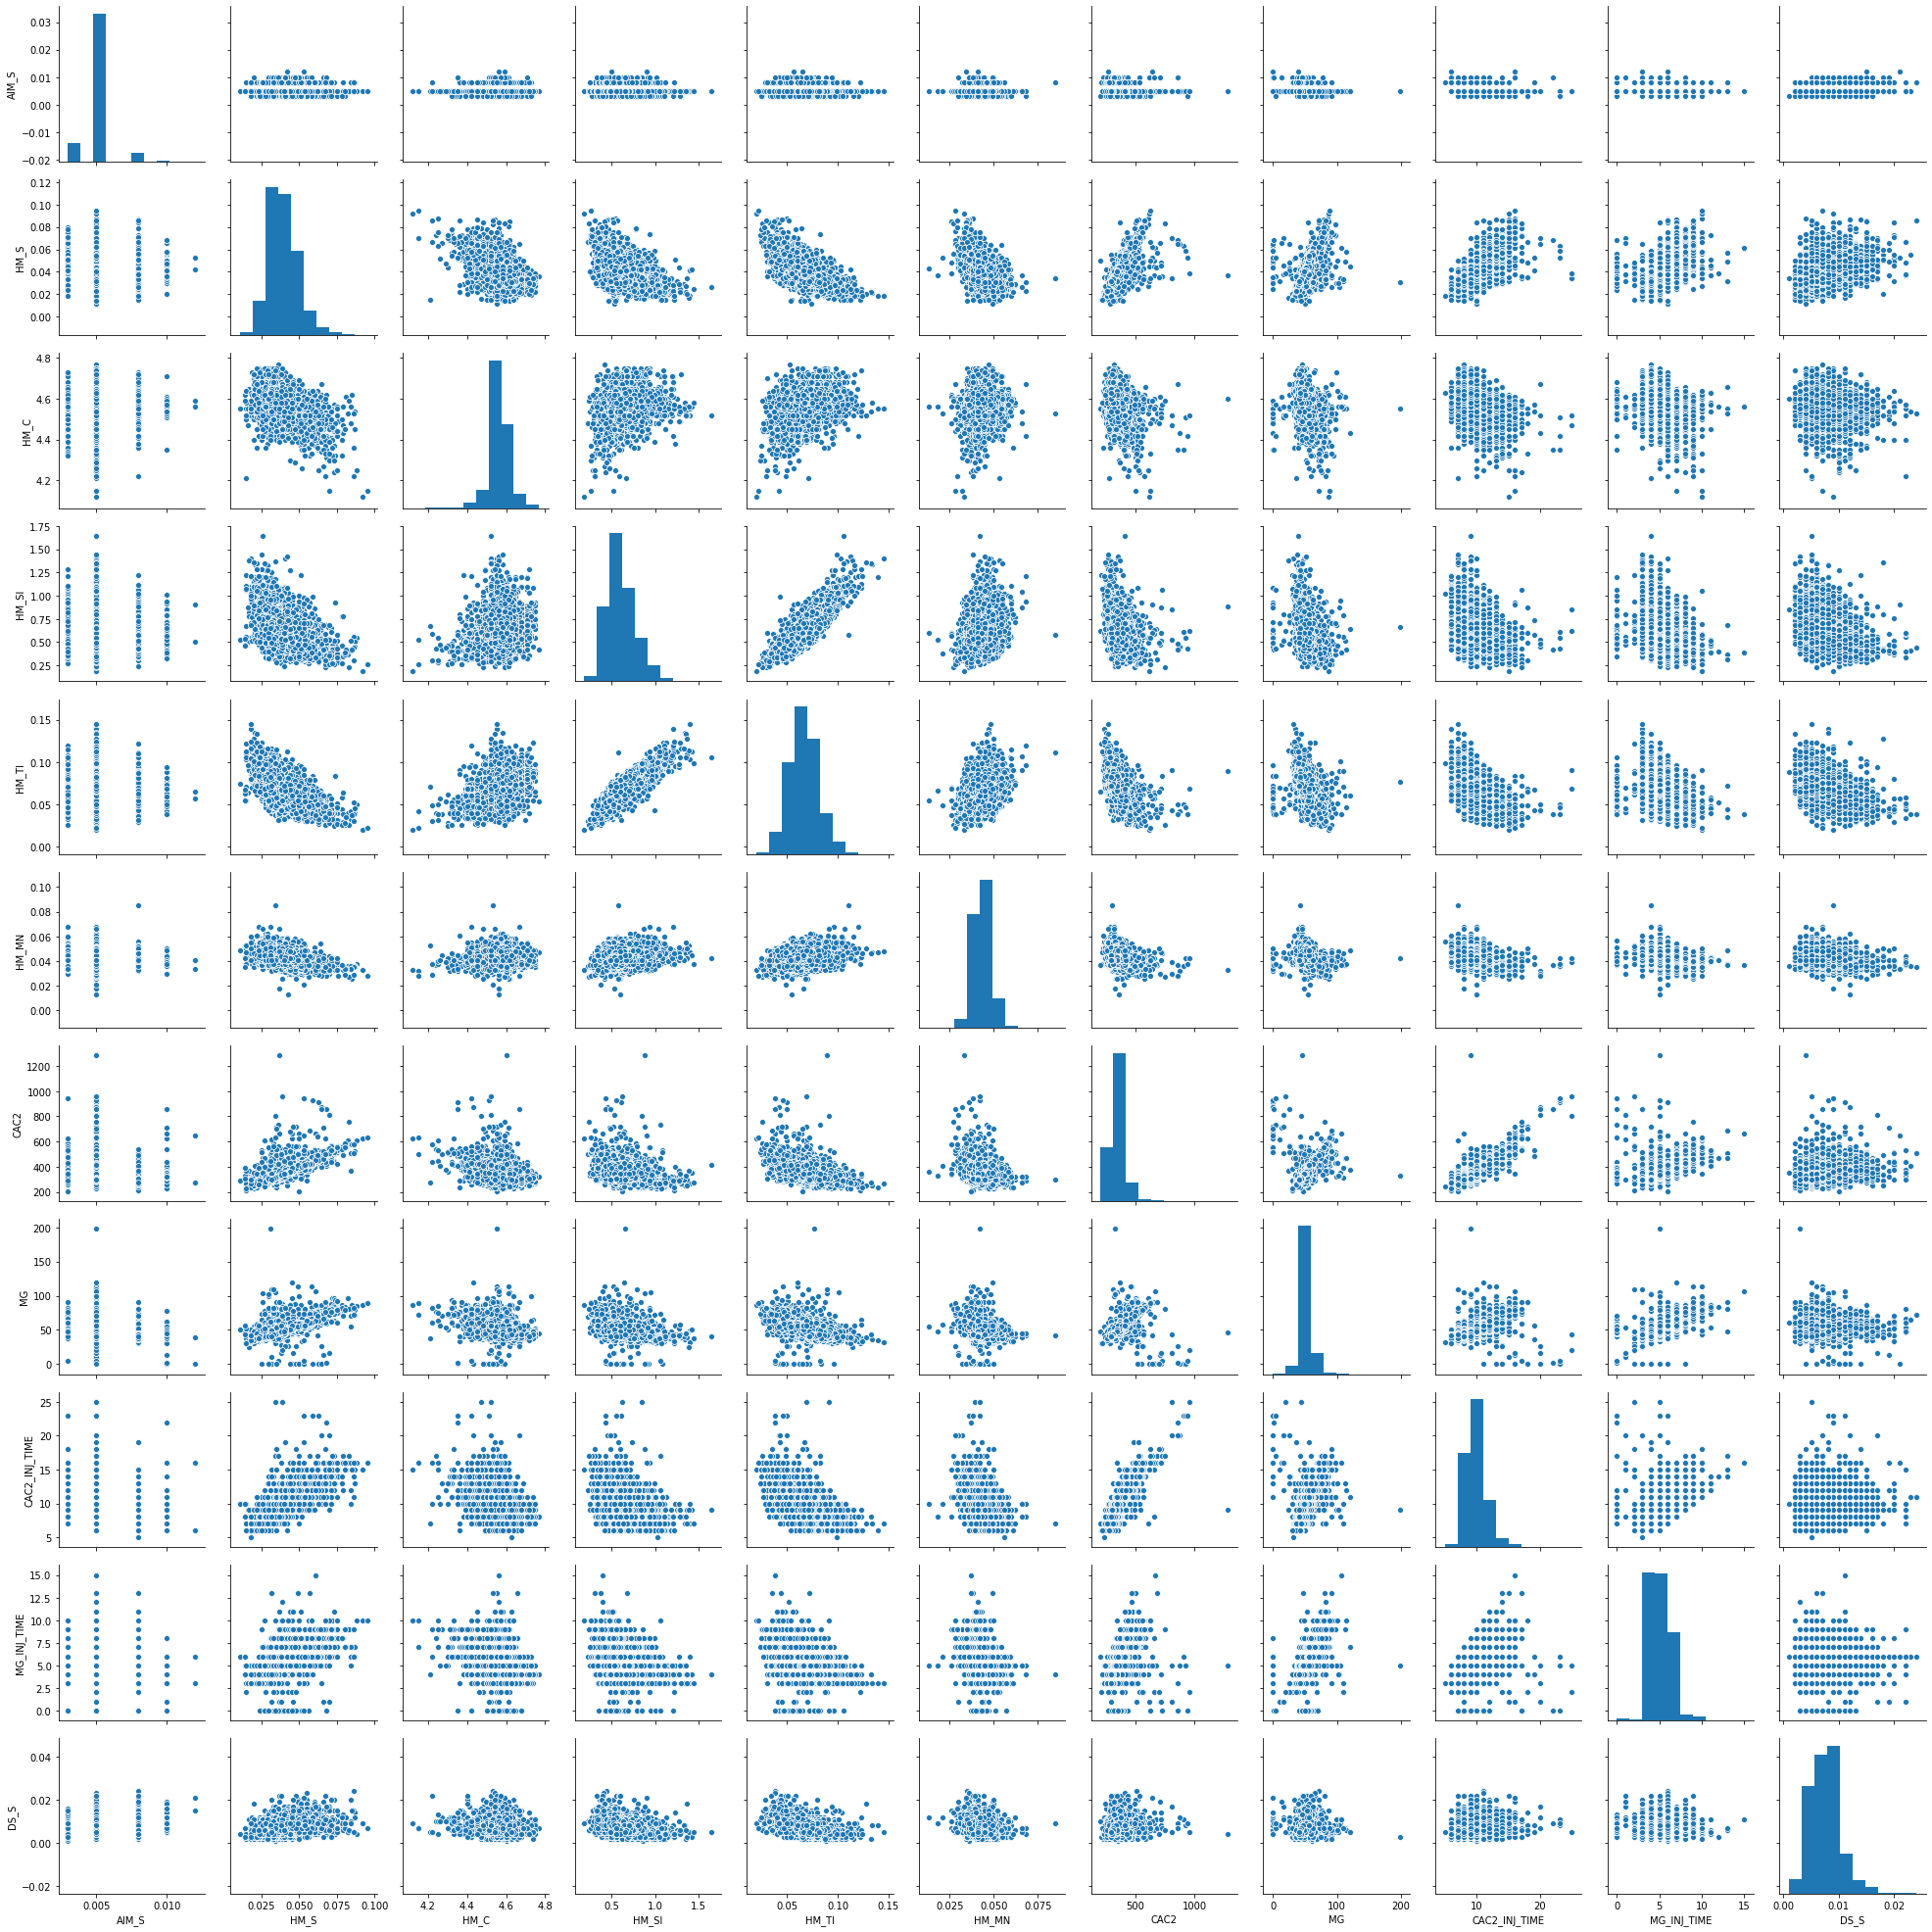

In [45]:
sns.pairplot(data_fit2)
plt.tight_layout()

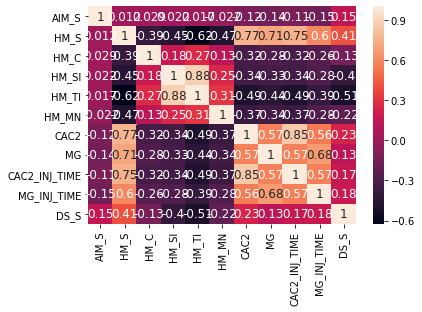

In [46]:
sns.heatmap(data_fit2.corr(), annot=True, annot_kws={'size': 12})


In [82]:
data_fit2.head()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,CAC2_INJ_TIME,MG_INJ_TIME,DS_S
0,171,0.005,0.040,4.572,0.518,0.069,0.040,347,49,10,4,0.009
1,161,0.005,0.035,4.580,0.559,0.070,0.041,361,45,10,4,0.007
2,170,0.005,0.042,4.590,0.468,0.044,0.036,355,52,9,4,0.013
3,159,0.005,0.034,4.530,0.737,0.077,0.040,313,44,9,4,0.010
4,162,0.005,0.042,4.560,0.443,0.056,0.037,360,55,10,5,0.013


In [83]:
X=data_fit2.iloc[:,0:11]
Y=data_fit2.iloc[:,11]

In [118]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=13)

In [119]:
model=LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [120]:
Y_predict=model.predict(X_test)

In [121]:
print(Y_test.shape[0])
temp1=Y_test.shape[0]

1340


In [123]:
# Calculating Accuracy
score=0
temp=0
for i in range(temp1):
    temp=Y_test[i]-Y_predict[i]
    if(temp>-0.003 and temp<0.003):
        score=score+1
score=score/(temp1)
print(score)
    

0.8753731343283582


In [96]:
#My accuracy come out to be approx 87%